### LITTLE EYES
#### Meu Primeiro Modelo de Visão Computacional

In [10]:
digit_size = (28, 28, 1)
convnn_activation = 'relu'
fully_connected_activation = 'relu'

In [11]:
import tensorflow
from tensorflow.keras import datasets, models, layers, optimizers, Input, Model
from matplotlib import pyplot

### Data Preparation

In [12]:
(train_images, train_labels), (validation_images, validation_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, validation_images = train_images / 255.0, validation_images / 255.0

In [13]:
train_images.shape, validation_images.shape

((60000, 28, 28), (10000, 28, 28))

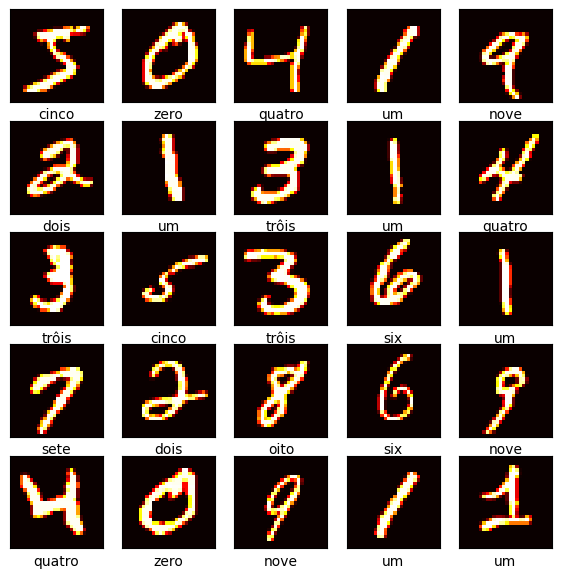

In [14]:
class_names = ['zero', 'um', 'dois', 'trôis', 'quatro',
               'cinco', 'six', 'sete', 'oito', 'nove']

pyplot.figure(figsize=(7, 7))
for i in range(25):
    pyplot.subplot(5,5,i+1)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.grid(False)
    pyplot.imshow(train_images[i], cmap="hot")
    pyplot.xlabel(class_names[train_labels[i]])
pyplot.show()

### Modeling

### API FUNCIONAL

In [15]:
# CAMADA DE ENTRADA
inputs = Input(shape=digit_size)

# PRIMEIRA CAMADA CONVOLUCIONAL
conv_2d_layer_1 = layers.Conv2D(2, (3, 3), activation=convnn_activation)
x = conv_2d_layer_1(inputs)

# PRIMEIRA CAMADA MAX POOLING
maxpool_1 = layers.MaxPooling2D((2, 2))
x = maxpool_1(x)

# SEGUNDA CAMADA CONVOLUCIONAL
conv_2d_layer_2 = layers.Conv2D(4, (3, 3), activation=convnn_activation)
x = conv_2d_layer_2(x)

# SEGUNDA CAMADA MAX POOLING
maxpool_2 = layers.MaxPooling2D((2, 2))
x = maxpool_2(x)

# TERCEIRA CAMADA CONVOLUCIONAL
conv_2d_layer_3 = layers.Conv2D(4, (3, 3), activation=convnn_activation)
x = conv_2d_layer_3(x)

# TERCEIRA CAMADA MAX POOLING
maxpool_3 = layers.MaxPooling2D((2, 2))
x = maxpool_3(x)

# FLATTEN
flatten_layer = layers.Flatten()
x = flatten_layer(x)

# FULLY CONNECTED HIDDEN LAYER
hidden_layer = layers.Dense(2, activation=fully_connected_activation)
x = hidden_layer(x)

# OUTPUT LAYER
output_layer = layers.Dense(10)
outputs = output_layer(x)

model_funk = Model(inputs=inputs, outputs=outputs, name="LittleEyes")

In [16]:
model_funk.summary()

Model: "LittleEyes"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 2)         20        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 2)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 4)         76        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 4)          0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 4)           1

#### API SEQUENCIAL

In [ ]:
model = models.Sequential(name="LittleEyes")
model.add(layers.Conv2D(2, (3, 3), activation=convnn_activation, input_shape=digit_size))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(4, (3, 3), activation=convnn_activation))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(4, (3, 3), activation=convnn_activation))
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
# model.summary()

Model: "LittleEyes"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 2)         20        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 2)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 4)         76        
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 4)          0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 4)           148       
                                                                 
Total params: 244
Trainable params: 244
Non-trainable pa

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(2, activation=fully_connected_activation))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "LittleEyes"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 2)         20        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 2)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 4)         76        
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 4)          0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 4)           148       
                                                                 
 flatten_2 (Flatten)         (None, 36)                0

In [ ]:
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],)

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/20
1875/1875 [==============================] - 21s 10ms/step - loss: 1.6362 - accuracy: 0.3883 - val_loss: 1.2866 - val_accuracy: 0.5426
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 1.1558 - accuracy: 0.6057 - val_loss: 1.0515 - val_accuracy: 0.6623
Epoch 3/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.9902 - accuracy: 0.6827 - val_loss: 0.9160 - val_accuracy: 0.7116
Epoch 4/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.8891 - accuracy: 0.7217 - val_loss: 0.8294 - val_accuracy: 0.7401
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.8083 - accuracy: 0.7511 - val_loss: 0.7601 - val_accuracy: 0.7675
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7475 - accuracy: 0.7725 - val_loss: 0.7147 - val_accuracy: 0.7856
Epoch 7/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.7083 - accuracy: 0.7863 - val_loss: 0.6944 -

313/313 - 2s - loss: 0.5561 - accuracy: 0.8366 - 2s/epoch - 5ms/step


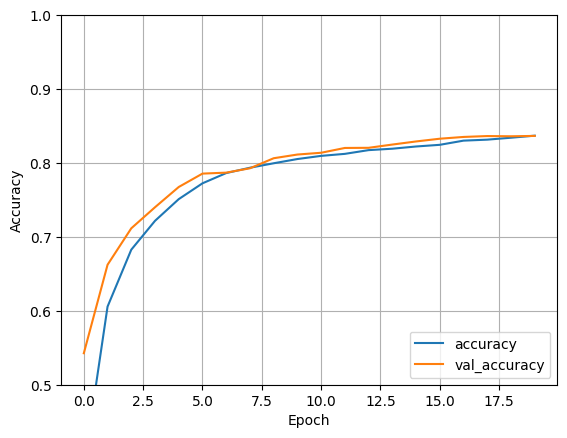

In [ ]:
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.plot(history.history['val_accuracy'], label = 'val_accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.ylim([0.5, 1])
pyplot.legend(loc='lower right')
pyplot.grid()
test_loss, test_acc = model.evaluate(validation_images,  validation_labels, verbose=2)